In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

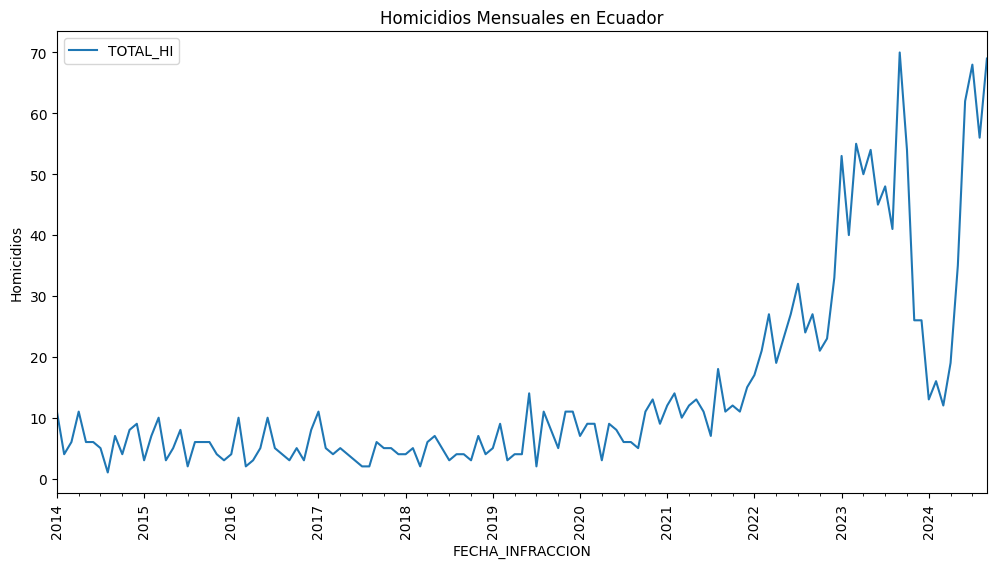

In [15]:
# 1. Cargar los datos
df = pd.read_excel("BDD/mdi_homicidios_intencionales_pm_2014-2023.xlsx",
                    sheet_name="bdd_hi_el_oro")

# Convertir columna de fecha al índice
df["FECHA_INFRACCION"] = pd.to_datetime(df["FECHA_INFRACCION"])  # Convertir la columna 'fecha' a formato datetime
df.set_index("FECHA_INFRACCION", inplace=True)  # Establecer 'fecha' como índice

# 2. Visualización de la serie
df.plot(figsize=(12, 6), title="Homicidios Mensuales en Ecuador", ylabel="Homicidios")
plt.xticks(rotation=90)  # Inclinamos las etiquetas del eje X para mayor legibilidad
plt.show()

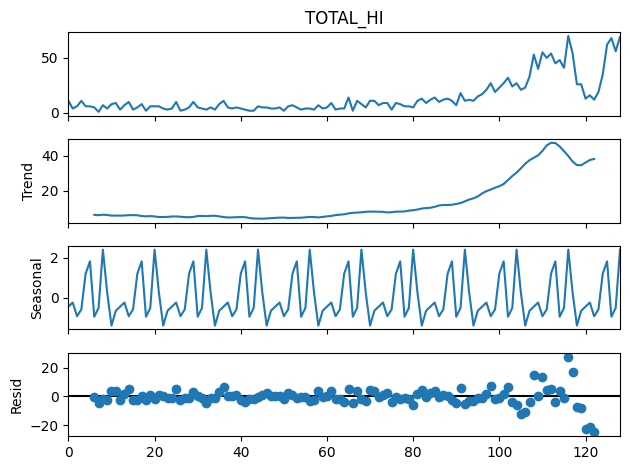

In [12]:
# 3. Descomponer la serie
result = seasonal_decompose(df["TOTAL_HI"], model="additive", period=12)
result.plot()
plt.show()

In [4]:
# 4. Ajuste automático del modelo ARIMA
modelo_auto = auto_arima(df["TOTAL_HI"], seasonal=True, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=866.128, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=865.869, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=865.815, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=864.660, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=868.125, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=868.125, Time=0.29 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=869.466, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=863.994, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=865.869, Time=0.15 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=867.282, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=865.947, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=865.941, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=863.954, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   

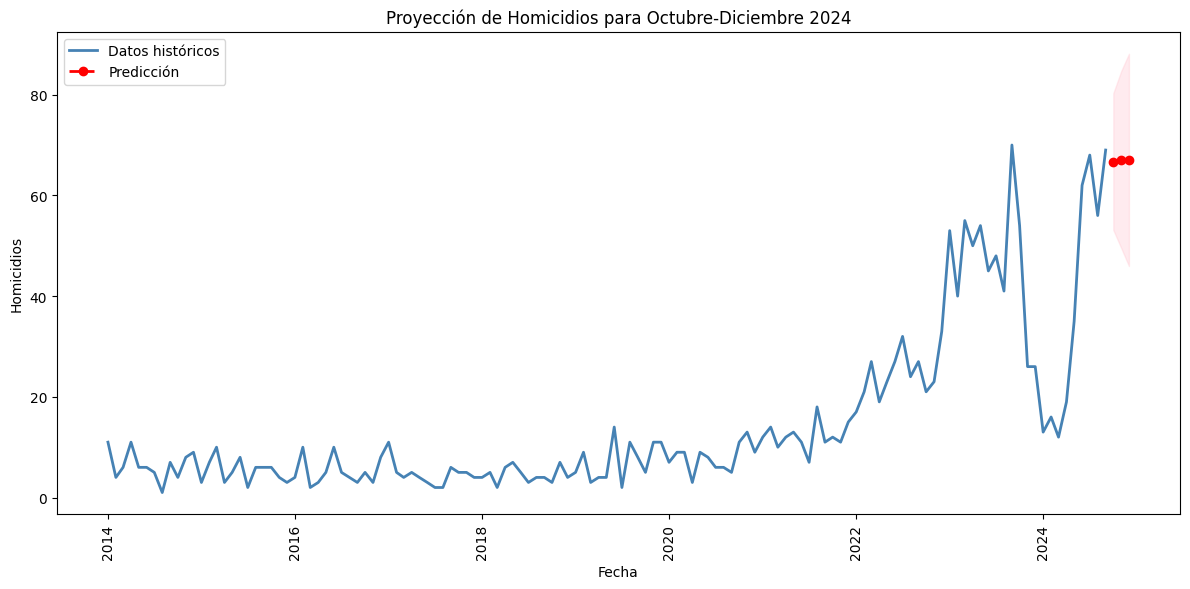

In [9]:
# 5. Entrenamiento del modelo SARIMA
modelo_sarima = SARIMAX(df["TOTAL_HI"],
                        order=modelo_auto.order,
                        seasonal_order=modelo_auto.seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
resultado = modelo_sarima.fit(disp=False)

# 6. Predicción a futuro
pred_periodos = 3  # 2 años de predicción
pred = resultado.get_forecast(steps=pred_periodos)
pred_conf = pred.conf_int()

# Crear un rango de fechas para los meses de octubre, noviembre y diciembre de 2024
fechas_pred = pd.date_range(start="2024-10-01", periods=pred_periodos, freq='MS')

# 7. Visualización de la predicción
plt.figure(figsize=(12, 6))
plt.plot(df["TOTAL_HI"], label="Datos históricos", color="steelblue", linewidth=2)
plt.plot(fechas_pred, pred.predicted_mean, label="Predicción", color="red", marker="o", linestyle="--", linewidth=2)
plt.fill_between(fechas_pred, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color="pink", alpha=0.3)
plt.legend()
plt.title("Proyección de Homicidios para Octubre-Diciembre 2024")
plt.xlabel("Fecha")
plt.ylabel("Homicidios")
plt.xticks(rotation=90)  # Inclinamos las etiquetas del eje X
plt.grid(False)
plt.tight_layout()  # Ajustar el diseño para evitar que se corten las etiquetas
plt.show()